## Datos linearmente separables y no linearmente separables

Este primer ejemplo muestra una serie de puntos que son linearmente separables

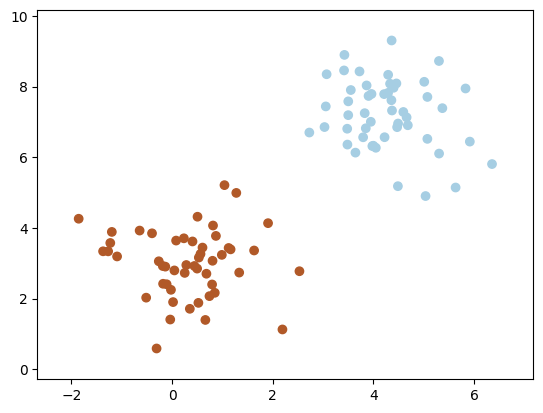

In [91]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

def plot_points(X,y):
    x_min, x_max, y_min, y_max = np.min(X[:,0]), np.max(X[:,0]), np.min(X[:,1]), np.max(X[:,1])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    x_margin = (x_max - x_min) * 0.1
    y_margin = (y_max - y_min) * 0.1
    x_min-=x_margin
    x_max+=x_margin
    y_min-=y_margin
    y_max+=y_margin
    plt.xlim([x_min,x_max])
    plt.ylim([y_min,y_max])
    return x_min, x_max, y_min, y_max

np.random.seed(1)

X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 10))
plot_points(X,y)
plt.savefig('../../imgs/tema2/separable_inicial.png')
plt.show()

### Separación de los datos con un perceptrón simple

Debido a que los datos son linearmente separables podemos aproximarlos con un simple perceptrón. Los pesos w de este perceptrón serán ajustados para minimizar el error

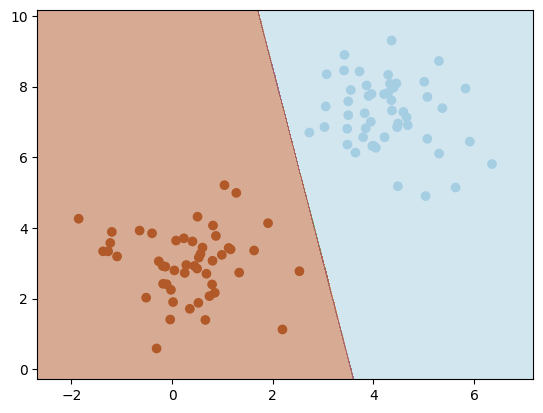

In [92]:
import matplotlib.pyplot as plt
import numpy as np

def perceptron(X, y, lr=0.1, epochs=100):
    w = np.zeros(X.shape[1])
    b = 0
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            a = np.dot(X[i], w) + b
            y_pred = np.where(a > 0, 1, 0)
            w += lr * (y[i] - y_pred) * X[i]
            b += lr * (y[i] - y_pred)
    return w, b

# Train the perceptron
w, b = perceptron(X, y)

# Plot the data points
x_min, x_max, y_min, y_max = plot_points(X,y)

# Plot the decision boundary
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
Z = np.where(Z > 0, 1, -1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)


# Display the equation of the separating line
#plt.text(6, 10, f"${w[0]:.2f}x_1 + {w[1]:.2f}x_2 + {b:.2f} = 0$", fontsize=12)

# Show the plot
plt.savefig('../../imgs/tema2/separable.png')
plt.show()

### Función de activación sigmoide para generar probabilidades

La función sigmoide a la salida puede usarse para convertir valores en probabilidades

Probabilidad para el punto (0,6) = 0.944711
Probabilidad para el punto (6,8) = 0.010960


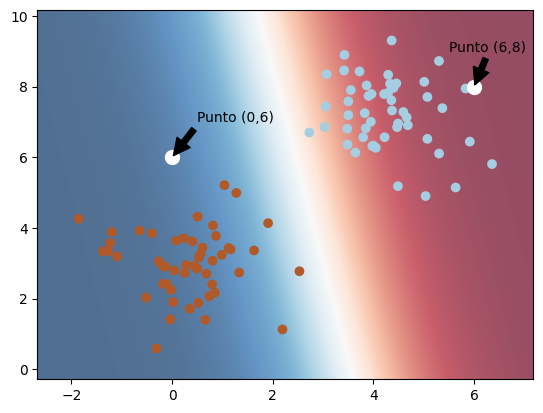

In [93]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

w, b = perceptron(X, y)


# Plot the decision boundary with sigmoid activation
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
y_hat = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b)

y_hat = y_hat.reshape(xx.shape)
# Plot the data points again
x_min, x_max, y_min, y_max = plot_points(X,y)

plt.imshow(y_hat, interpolation='bicubic', origin='lower',aspect='auto', cmap=plt.cm.RdBu, extent=(x_min, x_max, y_min, y_max), alpha=0.7)
plt.scatter(0,6,s=100,color='white')
plt.scatter(6,8,s=100,color='white')
plt.annotate('Punto (0,6)', xy=(0, 6), xytext=(0.5, 7),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Punto (6,8)', xy=(6, 8), xytext=(5.5, 9),
             arrowprops=dict(facecolor='black', shrink=0.05))

#Cálculo para el punto 0,6
y_hat_0_6 = sigmoid(0*w[0]+6*w[1] + b)
print("Probabilidad para el punto (0,6) = %f" % y_hat_0_6)

#Cálculo para el punto 6,8
y_hat_6_8 = sigmoid(6*w[0]+8*w[1] + b)
print("Probabilidad para el punto (6,8) = %f" % y_hat_6_8)


# Show the plot
plt.savefig('../../imgs/tema2/probabilidades.png')
plt.show()


### Datos no linearmente separables

En este caso los datos generados no se pueden separar con una linea (o plano).

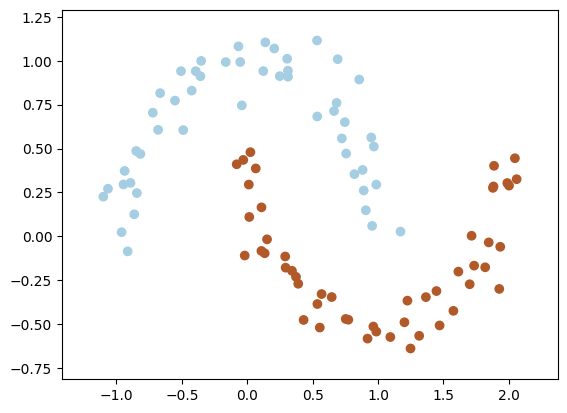

In [94]:
from sklearn.datasets import make_moons

# Generate a non-linearly separable dataset
X, y = make_moons(n_samples=100, noise=0.1, random_state=0)

# Plot the dataset
x_min, x_max, y_min, y_max = plot_points(X,y)
plt.savefig('../../imgs/tema2/noseparable_inicial.png')
plt.show()

Si intentamos usar el mismo perceptrón que antes vemos que los datos no pueden ser separados correctamente

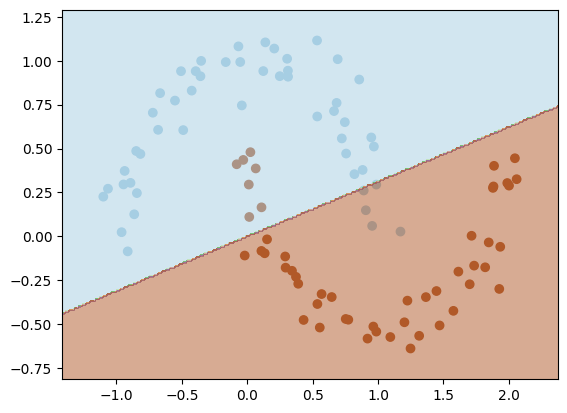

In [95]:
# Train the perceptron
w, b = perceptron(X, y)

# Plot the data points
x_min, x_max, y_min, y_max = plot_points(X,y)

# Plot the decision boundary
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
Z = np.where(Z > 0, 1, -1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)

# Show the plot
plt.savefig('../../imgs/tema2/noseparable.svg')
plt.show()

## Aproximar datos no lineales
En este ejemplo se utiliza una red de 10 neuronas es un capa oculta, con una función de activación no lineal ReLU. La combinación de perceptrones en diferentes capas más el uso de funciones de activación no lineales permite a las redes neuronales aproximar patrones complejos

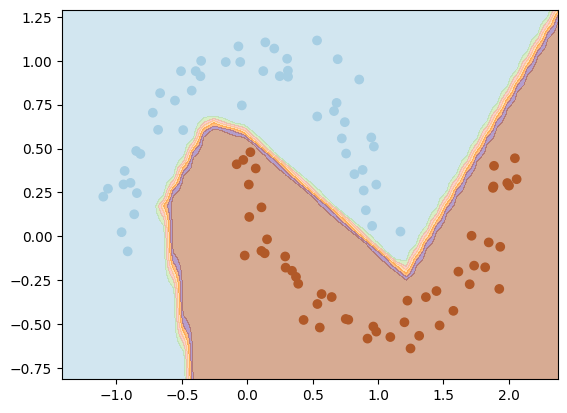

In [96]:
from sklearn.neural_network import MLPClassifier

# Fit logistic regression to the data
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='lbfgs', random_state=0)
clf.fit(X, y)

x_min, x_max, y_min, y_max = plot_points(X,y)

# Predict class probabilities for a grid of points
xx, yy = np.meshgrid(np.linspace(x_min, x_max, num=50), np.linspace(y_min, y_max, num=50))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot the data and the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)
plt.savefig('../../imgs/tema2/noseparable_nonlinear.png')
plt.show()